# **1. Perkenalan Dataset**


## Credit Card Fraud Detection Dataset

**Sumber Dataset**: [Kaggle - Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

**Deskripsi**:
Dataset ini berisi transaksi kartu kredit yang dilakukan oleh pemegang kartu Eropa pada September 2013. Dataset ini mencakup transaksi selama dua hari, dengan 492 kasus penipuan dari total 284,807 transaksi.

**Karakteristik Dataset**:
- **Highly Imbalanced**: Kelas positif (fraud) hanya mencakup 0.172% dari seluruh transaksi
- **Fitur**: V1-V28 adalah hasil transformasi PCA (untuk menjaga kerahasiaan data)
- **Time**: Detik yang berlalu antara setiap transaksi dan transaksi pertama
- **Amount**: Jumlah transaksi
- **Class**: Target variable (0 = Normal, 1 = Fraud)

**Tujuan**:
Membangun model machine learning untuk mendeteksi transaksi penipuan kartu kredit.

# **2. Import Library**

Pada tahap ini, kita mengimpor pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Import successful")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Import successful
Pandas version: 2.3.3
NumPy version: 2.4.0


# **3. Memuat Dataset**

Pada tahap ini, kita memuat dataset Credit Card Fraud Detection dan memeriksa struktur dasarnya.

In [31]:
df = pd.read_csv('creditcard_raw/creditcard.csv')

print("="*67) # Six Seven
print("DATASET LOADED")
print("="*67)
print(f"\nDataset Shape: {df.shape}")
print(f"Total Rows: {df.shape[0]:,}")
print(f"Total Columns: {df.shape[1]}")

DATASET LOADED

Dataset Shape: (284807, 31)
Total Rows: 284,807
Total Columns: 31


In [32]:
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
print("\nLast 5 rows of the dataset:")
df.tail()


Last 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [34]:
print("\nDataset Info:")
print("="*67)
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [35]:
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kita melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

## 4.1 Statistical Summary

In [36]:
print("Statistical Summary:")
print("="*67)
df.describe()

Statistical Summary:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 4.2 Missing Values Analysis

In [37]:
print("\nMissing Values:")
print("="*67)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print(missing_df[missing_df['Missing Values'] > 0])

if missing_df['Missing Values'].sum() == 0:
    print("\nGa ketemu missing values")
else:
    print(f"\nTotal missing value: {missing_df['Missing Values'].sum()}")


Missing Values:
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []

Ga ketemu missing values


## 4.3 Duplicate Data Analysis

In [38]:
print("\nDuplicate Data:")
print("="*67)
duplicates = df.duplicated().sum()
print(f"Jumlah of duplicate rows: {duplicates}")
print(f"Persentase duplicates: {(duplicates/len(df))*100:.4f}%")


Duplicate Data:
Jumlah of duplicate rows: 1081
Persentase duplicates: 0.3796%


## 4.4 Target Variable Distribution (Class Imbalance)

In [39]:
print("\nTarget Variable Distribution:")
print("="*67)
class_counts = df['Class'].value_counts()
class_percentage = df['Class'].value_counts(normalize=True) * 100

print(f"\nClass 0 (Normal): {class_counts[0]:,} ({class_percentage[0]:.4f}%)")
print(f"Class 1 (Fraud): {class_counts[1]:,} ({class_percentage[1]:.4f}%)")
print(f"\nImbalance Ratio: 1:{class_counts[0]//class_counts[1]}")


Target Variable Distribution:

Class 0 (Normal): 284,315 (99.8273%)
Class 1 (Fraud): 492 (0.1727%)

Imbalance Ratio: 1:577


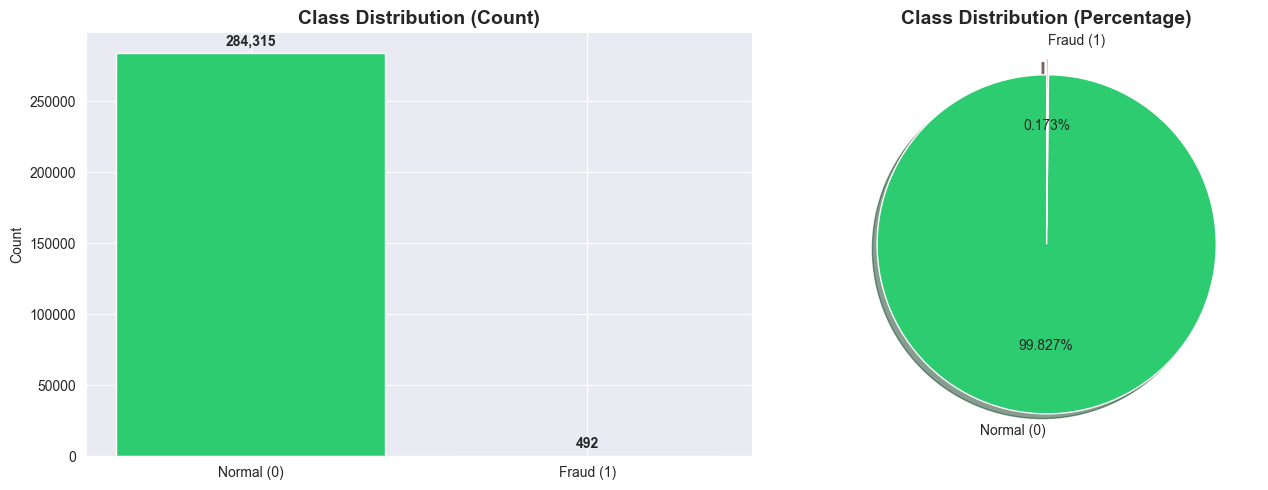


 HIGHLY IMBALANCED. PERLU SMOTE


In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plotnya
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(['Normal (0)', 'Fraud (1)'], class_counts.values, color=colors)
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 5000, f'{v:,}', ha='center', fontweight='bold')

# Pie chartnya
axes[1].pie(class_counts.values, labels=['Normal (0)', 'Fraud (1)'], 
            autopct='%1.3f%%', colors=colors, explode=[0, 0.1],
            shadow=True, startangle=90)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('preprocessing/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n HIGHLY IMBALANCED. PERLU SMOTE")

## 4.5 Feature Analysis

In [41]:
print("\nTime Feature Analysis:")
print("="*67)
print(f"Min Time: {df['Time'].min()} seconds")
print(f"Max Time: {df['Time'].max()} seconds")
print(f"Max Time in hours: {df['Time'].max()/3600:.2f} hours")
print(f"Max Time in days: {df['Time'].max()/86400:.2f} days")


Time Feature Analysis:
Min Time: 0.0 seconds
Max Time: 172792.0 seconds
Max Time in hours: 48.00 hours
Max Time in days: 2.00 days


In [42]:
print("\nAmount Feature Analysis:")
print("="*67)
print(f"Min Amount: ${df['Amount'].min():.2f}")
print(f"Max Amount: ${df['Amount'].max():.2f}")
print(f"Mean Amount: ${df['Amount'].mean():.2f}")
print(f"Median Amount: ${df['Amount'].median():.2f}")
print(f"Std Amount: ${df['Amount'].std():.2f}")


Amount Feature Analysis:
Min Amount: $0.00
Max Amount: $25691.16
Mean Amount: $88.35
Median Amount: $22.00
Std Amount: $250.12


In [43]:
print("\nKomparasi Amount - Normal vs Fraud:")
print("="*67)
print("\nNormal Transactions:")
print(df[df['Class'] == 0]['Amount'].describe())
print("\nFraudulent Transactions:")
print(df[df['Class'] == 1]['Amount'].describe())


Komparasi Amount - Normal vs Fraud:

Normal Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraudulent Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


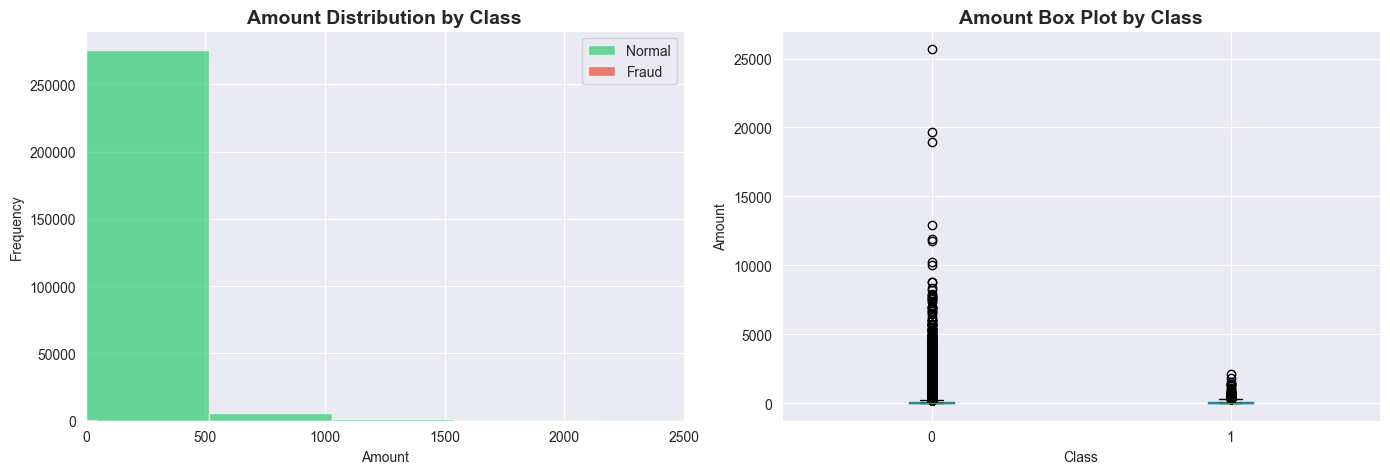

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.7, label='Normal', color='#2ecc71')
axes[0].hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.7, label='Fraud', color='#e74c3c')
axes[0].set_title('Amount Distribution by Class', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].set_xlim([0, 2500])

df.boxplot(column='Amount', by='Class', ax=axes[1])
axes[1].set_title('Amount Box Plot by Class', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Amount')
plt.suptitle('')

plt.tight_layout()
plt.savefig('preprocessing/amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

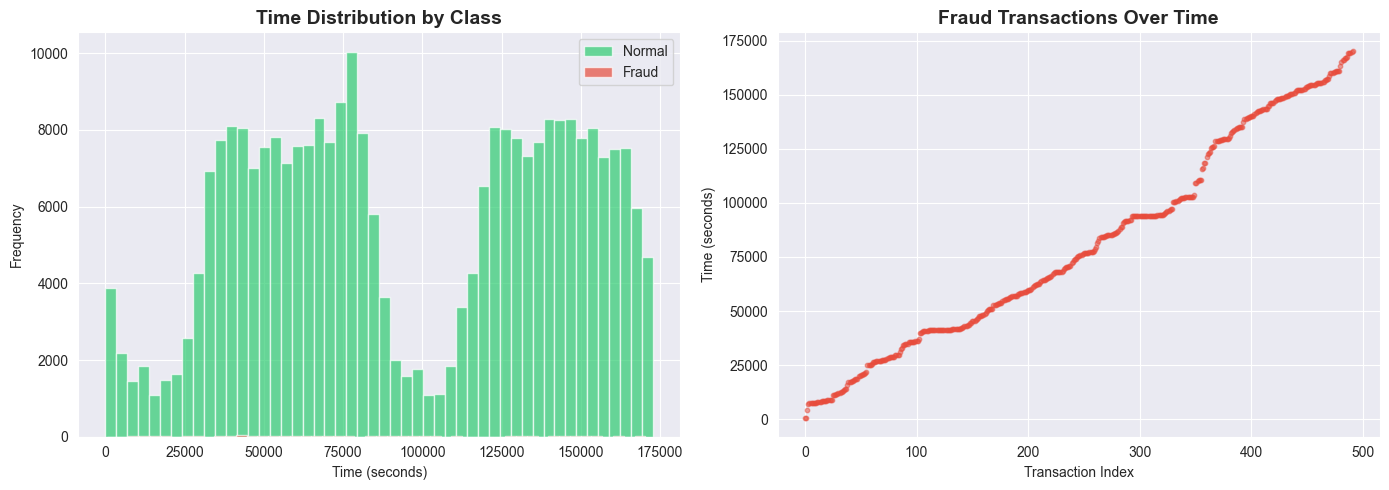

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df[df['Class'] == 0]['Time'], bins=50, alpha=0.7, label='Normal', color='#2ecc71')
axes[0].hist(df[df['Class'] == 1]['Time'], bins=50, alpha=0.7, label='Fraud', color='#e74c3c')
axes[0].set_title('Time Distribution by Class', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

fraud_time = df[df['Class'] == 1]['Time']
axes[1].scatter(range(len(fraud_time)), fraud_time.values, alpha=0.5, color='#e74c3c', s=10)
axes[1].set_title('Fraud Transactions Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Transaction Index')
axes[1].set_ylabel('Time (seconds)')

plt.tight_layout()
plt.savefig('preprocessing/time_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 4.6 Correlation Analysis

In [47]:
print("\nCorrelation with Target (Class):")
print("="*67)
correlations = df.corr()['Class'].sort_values(ascending=False)
print("\nTop 10 Positive Correlations:")
print(correlations.head(10))
print("\nTop 10 Negative Correlations:")
print(correlations.tail(10))


Correlation with Target (Class):

Top 10 Positive Correlations:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Top 10 Negative Correlations:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


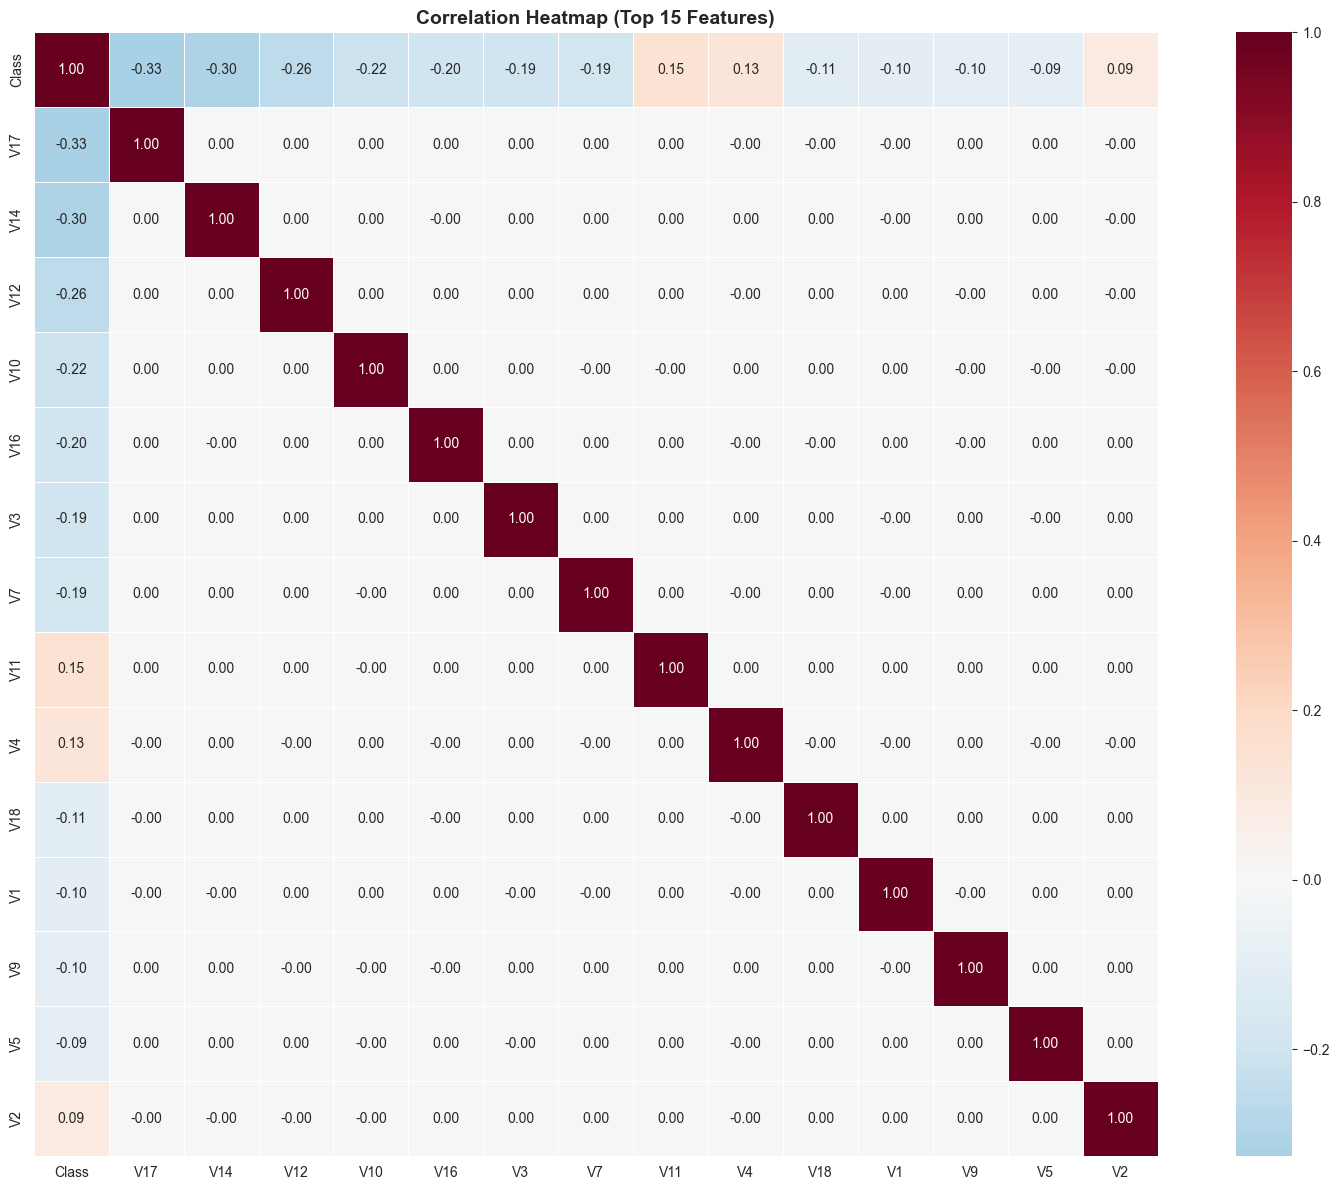

In [51]:
plt.figure(figsize=(16, 12))

top_features = correlations.abs().sort_values(ascending=False).head(15).index.tolist()
corr_matrix = df[top_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap (Top 15 Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('preprocessing/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## 4.7 Feature Distribution (V1-V28)

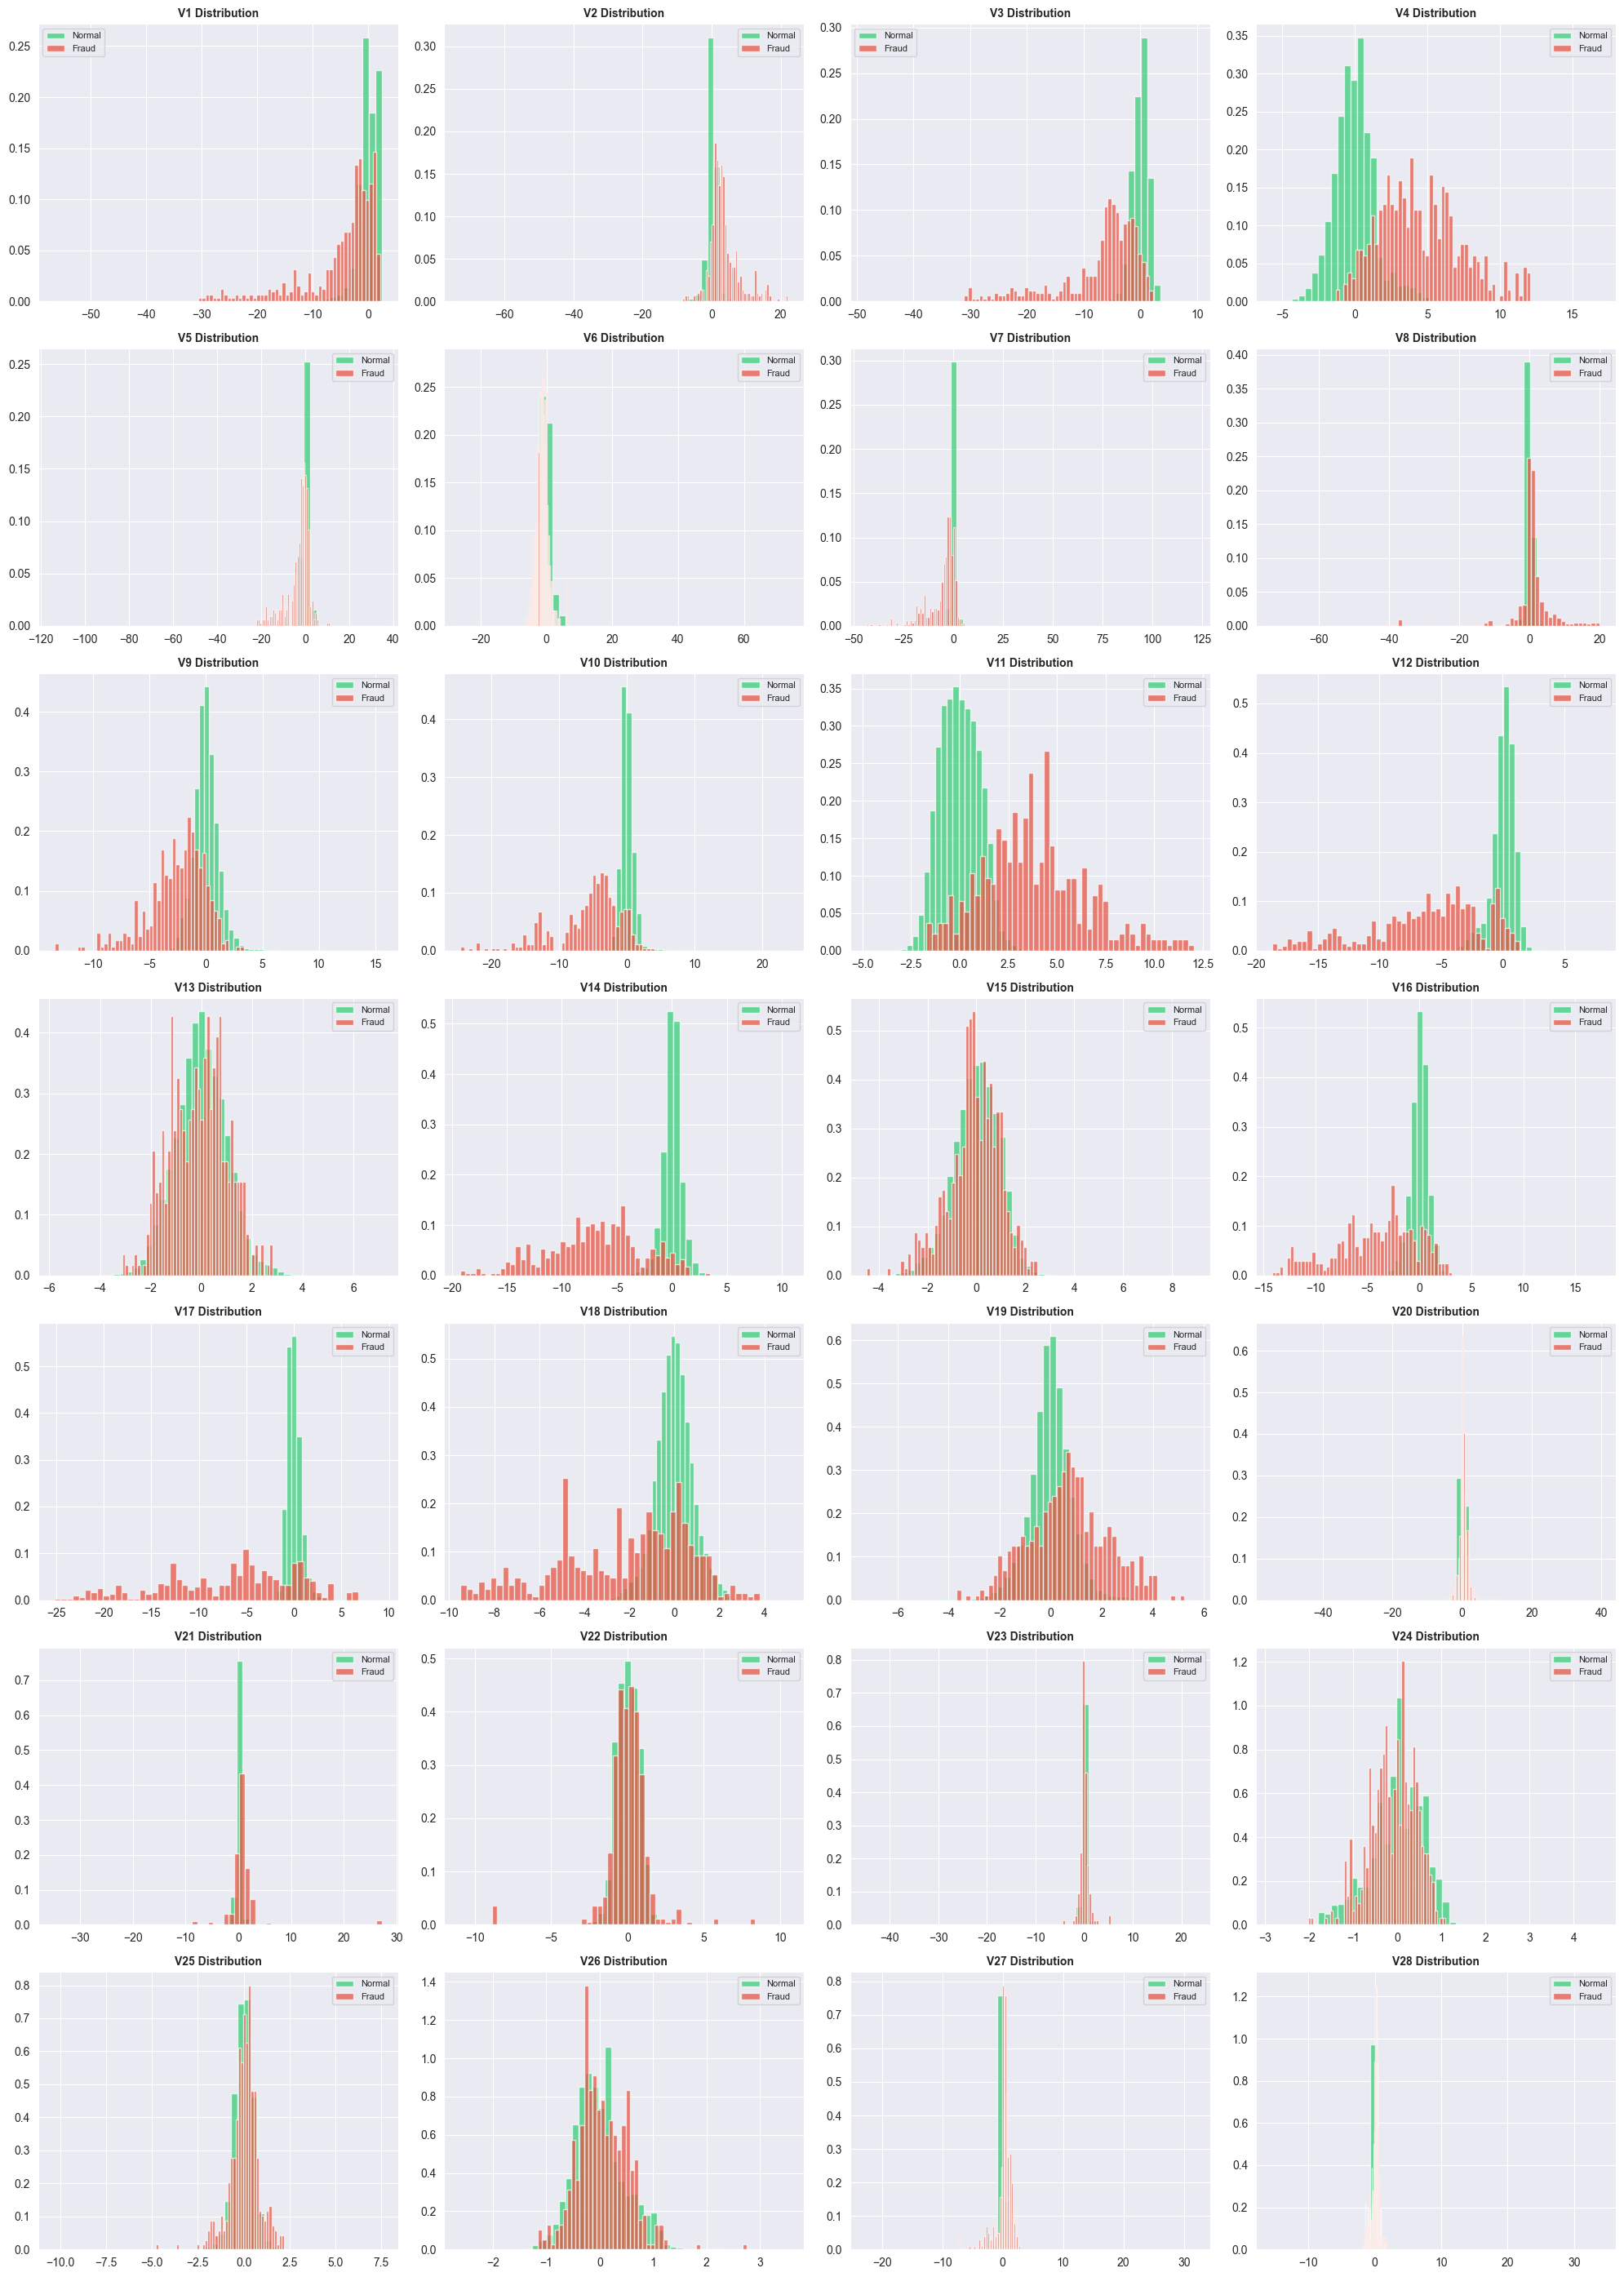

In [50]:
v_features = [f'V{i}' for i in range(1, 29)]

fig, axes = plt.subplots(7, 4, figsize=(20, 28))
axes = axes.flatten()

for i, feature in enumerate(v_features):
    axes[i].hist(df[df['Class'] == 0][feature], bins=50, alpha=0.7, label='Normal', color='#2ecc71', density=True)
    axes[i].hist(df[df['Class'] == 1][feature], bins=50, alpha=0.7, label='Fraud', color='#e74c3c', density=True)
    axes[i].set_title(f'{feature} Distribution', fontsize=10, fontweight='bold')
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.savefig('preprocessing/pca_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 4.8 EDA Summary

In [52]:
print(f"""
   Overview:
   - Total Transactions: {len(df):,}
   - Total Features: {df.shape[1]}
   - Missing Values: {df.isnull().sum().sum()}
   - Duplicate Rows: {df.duplicated().sum()}

  Class Imbalance:
   - Normal (Class 0): {class_counts[0]:,} ({class_percentage[0]:.4f}%)
   - Fraud (Class 1): {class_counts[1]:,} ({class_percentage[1]:.4f}%)
   - Imbalance Ratio: 1:{class_counts[0]//class_counts[1]}
""")


   Overview:
   - Total Transactions: 284,807
   - Total Features: 31
   - Missing Values: 0
   - Duplicate Rows: 1081

  Class Imbalance:
   - Normal (Class 0): 284,315 (99.8273%)
   - Fraud (Class 1): 492 (0.1727%)
   - Imbalance Ratio: 1:577



# **5. Data Preprocessing**

Pada tahap ini, kita akan melakukan preprocessing data untuk mempersiapkan dataset sebelum digunakan dalam model machine learning.

**Tahapan Preprocessing:**
1. Menghapus Data Duplikat
2. Scaling Fitur (Amount dan Time)
3. Split Data (Train/Test)
4. Handling Imbalanced Data dengan SMOTE

## 5.1 Remove Duplicates

In [53]:
print("Removing Duplicates:")
print("="*67)
print(f"Shape before: {df.shape}")

df_clean = df.drop_duplicates()

print(f"Shape after: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Removing Duplicates:
Shape before: (284807, 31)
Shape after: (283726, 31)
Rows removed: 1081


## 5.2 Feature Scaling

In [54]:
print("\nFeature Scaling:")
print("="*67)

scaler = StandardScaler()

df_clean['Amount_scaled'] = scaler.fit_transform(df_clean[['Amount']])

df_clean['Time_scaled'] = scaler.fit_transform(df_clean[['Time']])

df_processed = df_clean.drop(['Amount', 'Time'], axis=1)

print("Amount dan Time features sudah ke scaled with StandardScaler")
print(f"\nNew columns added: 'Amount_scaled', 'Time_scaled'")
print(f"Original columns removed: 'Amount', 'Time'")


Feature Scaling:
Amount dan Time features sudah ke scaled with StandardScaler

New columns added: 'Amount_scaled', 'Time_scaled'
Original columns removed: 'Amount', 'Time'


In [56]:
# Verif
print("\nScaled Features Statistics:")
print(df_processed[['Amount_scaled', 'Time_scaled']].describe())


Scaled Features Statistics:
       Amount_scaled   Time_scaled
count   2.837260e+05  2.837260e+05
mean   -8.013847e-19  1.538659e-16
std     1.000002e+00  1.000002e+00
min    -3.533268e-01 -1.996823e+00
25%    -3.309625e-01 -8.552128e-01
50%    -2.654671e-01 -2.131081e-01
75%    -4.378088e-02  9.369423e-01
max     1.022476e+02  1.642362e+00


## 5.3 Prepare Features and Target

In [57]:
print("\nPreparasi Features and Target:")
print("="*67)

X = df_processed.drop('Class', axis=1)
y = df_processed['Class']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")


Preparasi Features and Target:
Features shape: (283726, 30)
Target shape: (283726,)

Feature columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_scaled', 'Time_scaled']


## 5.4 Train-Test Split

In [59]:
print("\nTrain-Test Split:")
print("="*67)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain class distribution
)

print(f"Training set size: {X_train.shape[0]:,} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]:,} ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTraining set class distribution:")
print(y_train.value_counts())

print(f"\nTest set class distribution:")
print(y_test.value_counts())


Train-Test Split:
Training set size: 226,980 (80.0%)
Test set size: 56,746 (20.0%)

Training set class distribution:
Class
0    226602
1       378
Name: count, dtype: int64

Test set class distribution:
Class
0    56651
1       95
Name: count, dtype: int64


## 5.5 Handle Imbalanced Data with SMOTE

In [60]:
print("\nApply SMOTE:")
print("="*67)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"\nBefore SMOTE:")
print(f"  - Training samples: {len(X_train):,}")
print(f"  - Class 0 (Normal): {(y_train == 0).sum():,}")
print(f"  - Class 1 (Fraud): {(y_train == 1).sum():,}")

print(f"\nAfter SMOTE:")
print(f"  - Training samples: {len(X_train_resampled):,}")
print(f"  - Class 0 (Normal): {(y_train_resampled == 0).sum():,}")
print(f"  - Class 1 (Fraud): {(y_train_resampled == 1).sum():,}")

print("\nTraining data sekarang sudah balanced")


Apply SMOTE:

Before SMOTE:
  - Training samples: 226,980
  - Class 0 (Normal): 226,602
  - Class 1 (Fraud): 378

After SMOTE:
  - Training samples: 453,204
  - Class 0 (Normal): 226,602
  - Class 1 (Fraud): 226,602

Training data sekarang sudah balanced


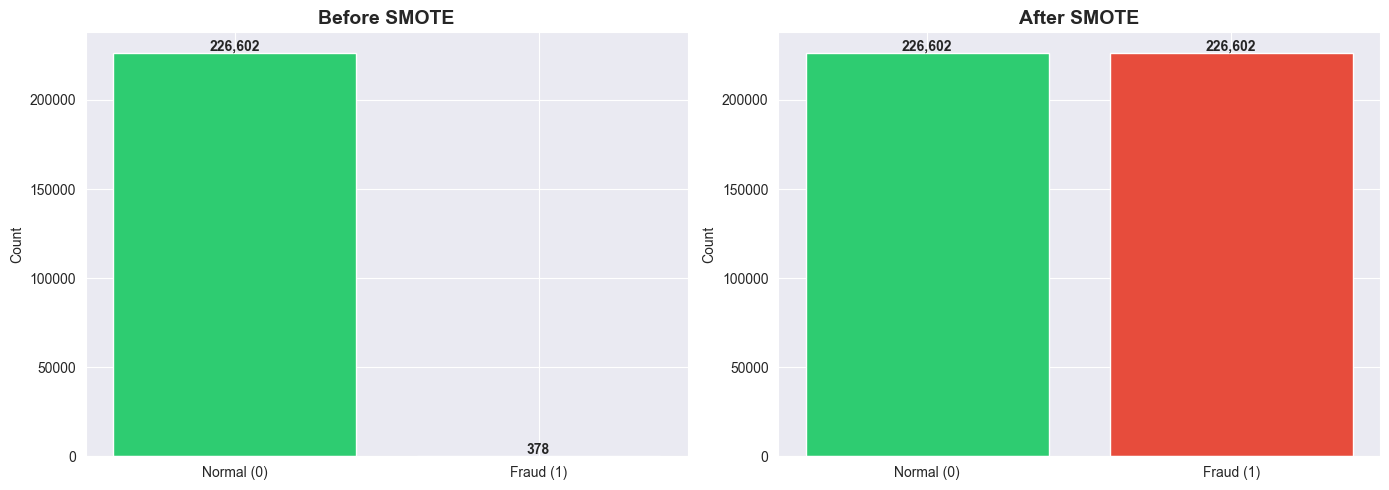

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before
before_counts = y_train.value_counts()
axes[0].bar(['Normal (0)', 'Fraud (1)'], before_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(before_counts.values):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')

# After
after_counts = pd.Series(y_train_resampled).value_counts()
axes[1].bar(['Normal (0)', 'Fraud (1)'], after_counts.values, color=['#2ecc71', '#e74c3c'])
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count')
for i, v in enumerate(after_counts.values):
    axes[1].text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('preprocessing/smote_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 5.6 Save Preprocessed Data

In [62]:
print("\nSaving Preprocessed Data:")
print("="*67)

train_df = pd.DataFrame(X_train_resampled, columns=X.columns)
train_df['Class'] = y_train_resampled

test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['Class'] = y_test.values

train_df.to_csv('preprocessing/creditcard_train.csv', index=False)
test_df.to_csv('preprocessing/creditcard_test.csv', index=False)

print(f"Training data saved: preprocessing/creditcard_train.csv")
print(f"   Shape: {train_df.shape}")
print(f"\nTest data saved: preprocessing/creditcard_test.csv")
print(f"   Shape: {test_df.shape}")


Saving Preprocessed Data:
Training data saved: preprocessing/creditcard_train.csv
   Shape: (453204, 31)

Test data saved: preprocessing/creditcard_test.csv
   Shape: (56746, 31)


## 5.7 Preprocessing Summary

In [63]:
print(f"""

   Output Files:
   - preprocessing/creditcard_train.csv ({train_df.shape[0]:,} rows)
   - preprocessing/creditcard_test.csv ({test_df.shape[0]:,} rows)

   Final Data Statistics:
   Training Set:
   - Total samples: {len(train_df):,}
   - Class 0: {(train_df['Class'] == 0).sum():,}
   - Class 1: {(train_df['Class'] == 1).sum():,}
   
   Test Set:
   - Total samples: {len(test_df):,}
   - Class 0: {(test_df['Class'] == 0).sum():,}
   - Class 1: {(test_df['Class'] == 1).sum():,}

""")



   Output Files:
   - preprocessing/creditcard_train.csv (453,204 rows)
   - preprocessing/creditcard_test.csv (56,746 rows)

   Final Data Statistics:
   Training Set:
   - Total samples: 453,204
   - Class 0: 226,602
   - Class 1: 226,602

   Test Set:
   - Total samples: 56,746
   - Class 0: 56,651
   - Class 1: 95


